# Breast cancer detection using Machine Learning
### By: Soorya Parthiban

### Importing the required libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing & Checking the dataset

In [2]:
cancer_df = pd.read_csv(r"D:\001_Data\END 2 END ML\001_Datasets\Breast Cancer Dataset\wisconsin_breast_cancer.csv")

In [3]:
cancer_df.head()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [4]:
cancer_df.tail()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1
698,897471,4,8,8,5,4,5.0,10,4,1,1


In [7]:
cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
single,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitosis,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [8]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   adhesion   699 non-null    int64  
 5   single     699 non-null    int64  
 6   nuclei     683 non-null    float64
 7   chromatin  699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   mitosis    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [13]:
cancer_df.isnull().sum()

id            0
thickness     0
size          0
shape         0
adhesion      0
single        0
nuclei       16
chromatin     0
nucleoli      0
mitosis       0
class         0
dtype: int64

##### Filling null values

In [16]:
mean_nuclei = np.round(cancer_df['nuclei'].mean())
print(mean_nuclei)

4.0


In [17]:
cancer_df['nuclei'].fillna(mean_nuclei, inplace=True)

In [18]:
cancer_df.isnull().sum()

id           0
thickness    0
size         0
shape        0
adhesion     0
single       0
nuclei       0
chromatin    0
nucleoli     0
mitosis      0
class        0
dtype: int64

### Data Visualization

Text(0, 0.5, 'Count')

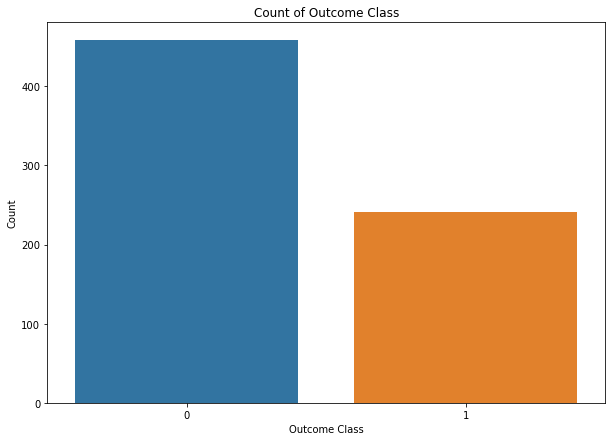

In [53]:
plt.figure(figsize=(10,7))
sns.countplot(cancer_df['class'])
plt.title("Count of Outcome Class")
plt.xlabel("Outcome Class")
plt.ylabel("Count")

Text(0.5, 1.0, 'Pairplot of independant variables')

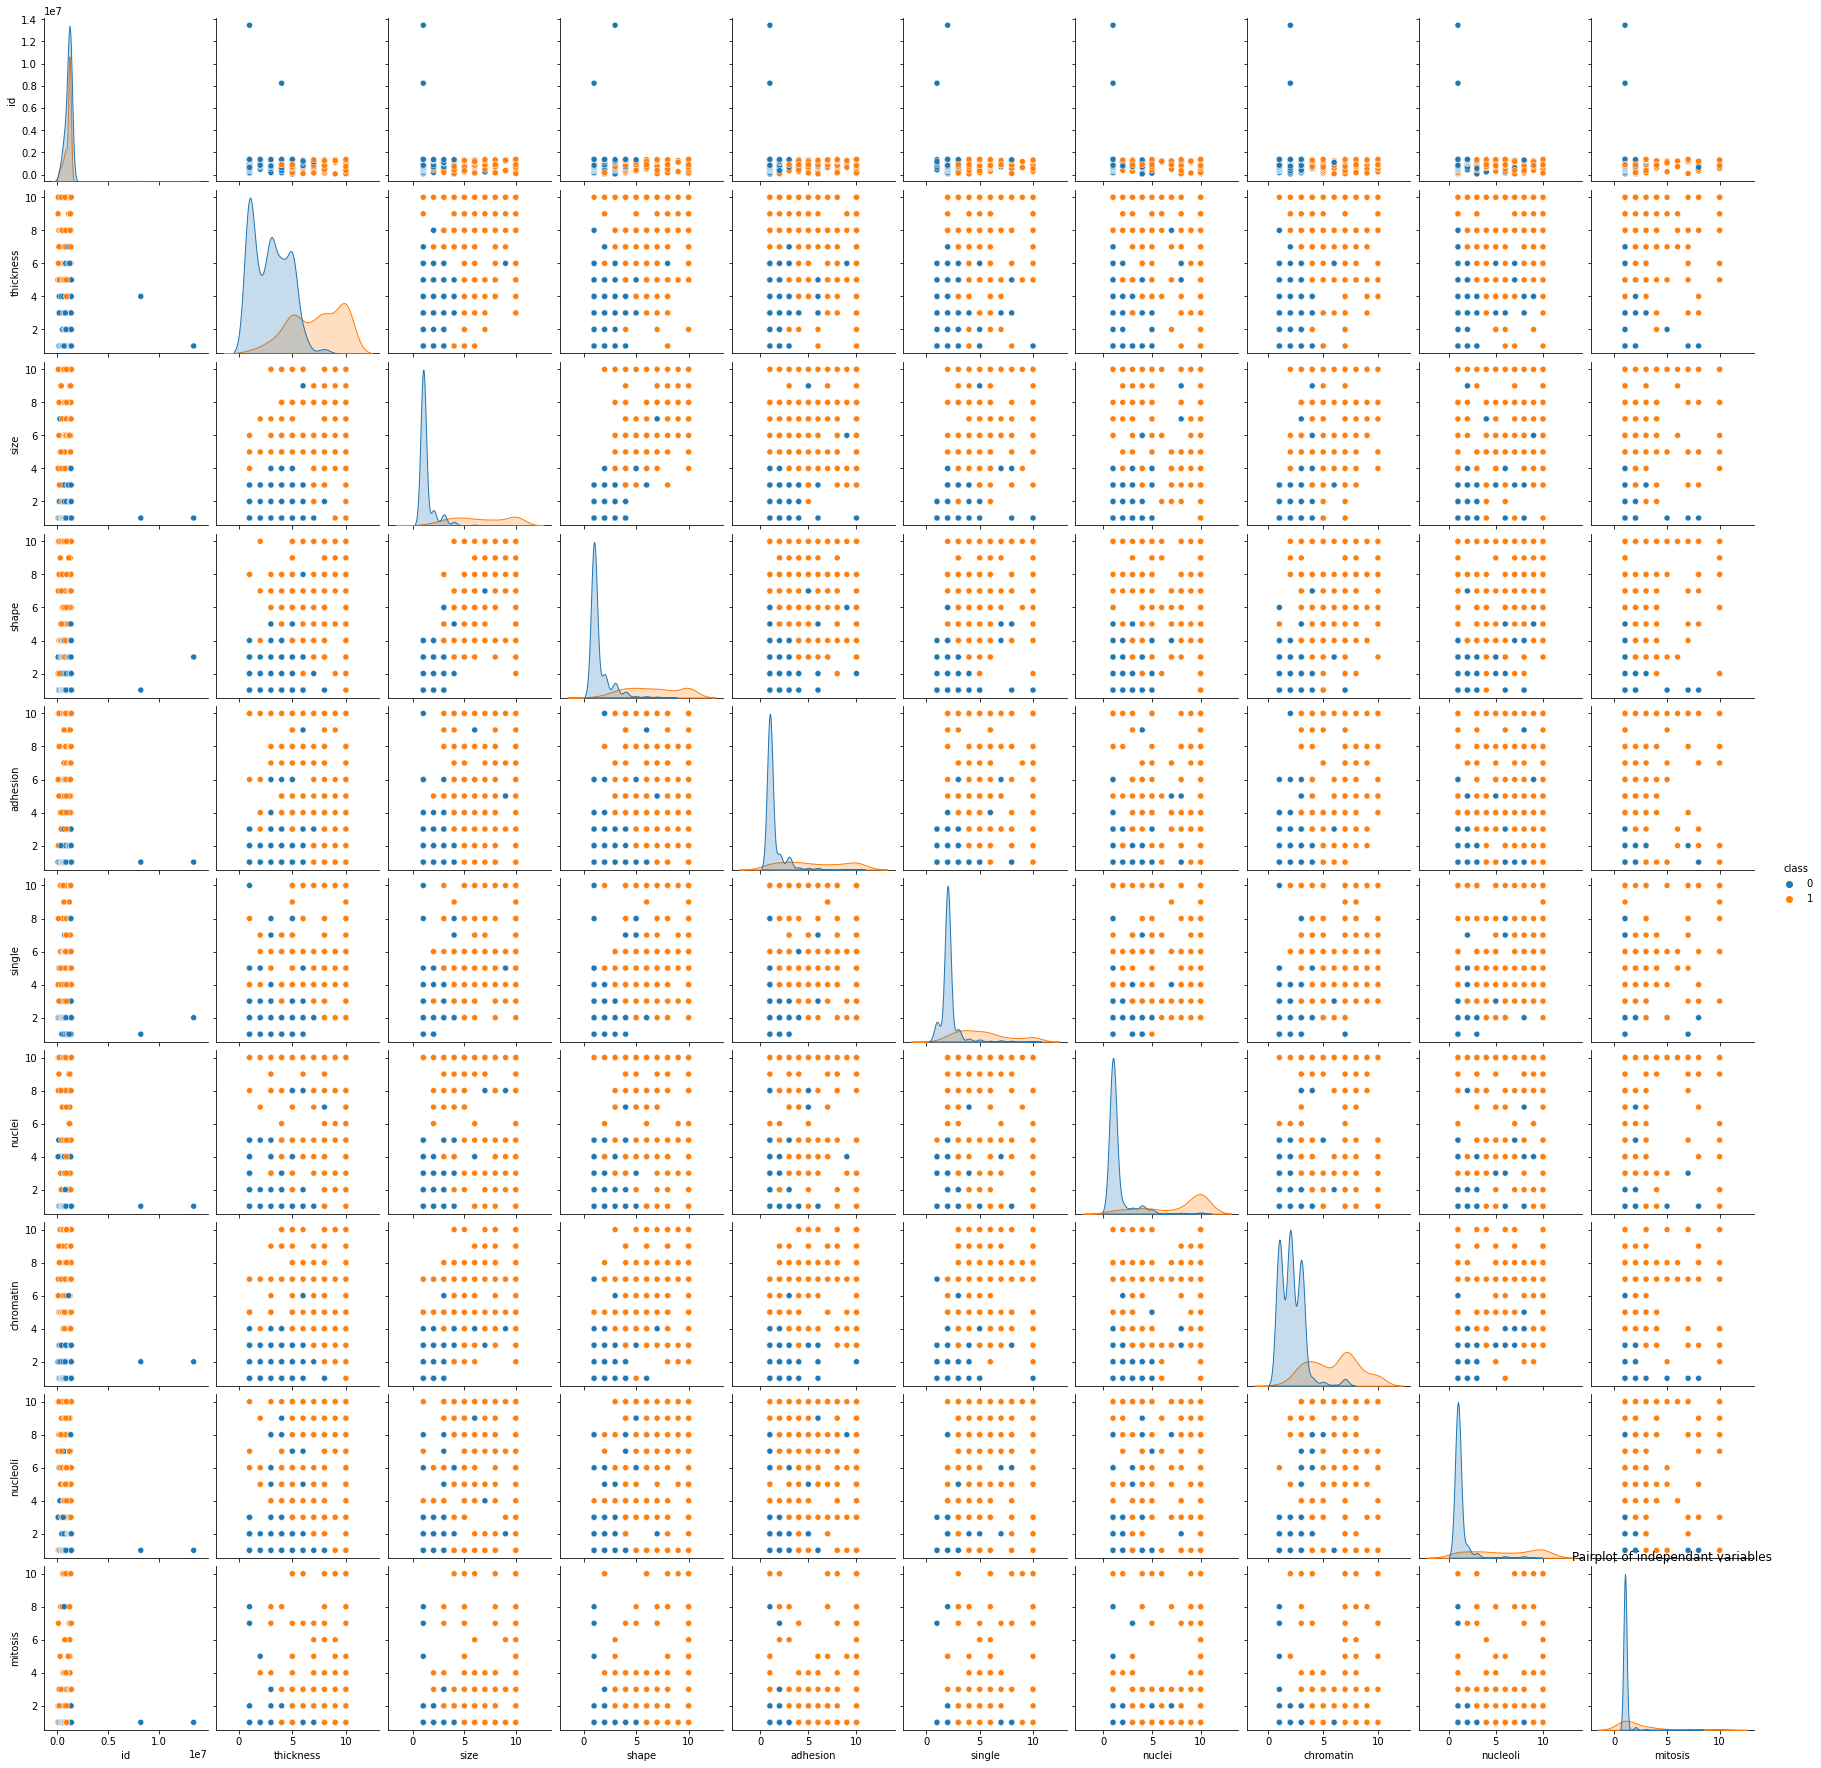

In [56]:
sns.pairplot(cancer_df, hue= 'class')
plt.title("Pairplot of independant variables")

Text(0, 0.5, 'Count')

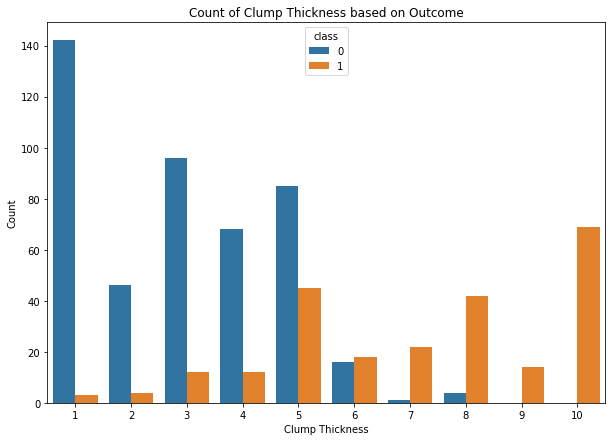

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(cancer_df['thickness'], hue=cancer_df['class'])
plt.title("Count of Clump Thickness based on Outcome")
plt.xlabel("Clump Thickness")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

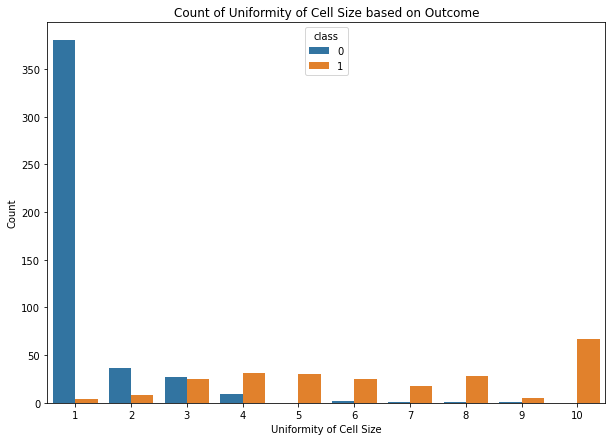

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(cancer_df['size'], hue=cancer_df['class'])
plt.title("Count of Uniformity of Cell Size based on Outcome")
plt.xlabel("Uniformity of Cell Size")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

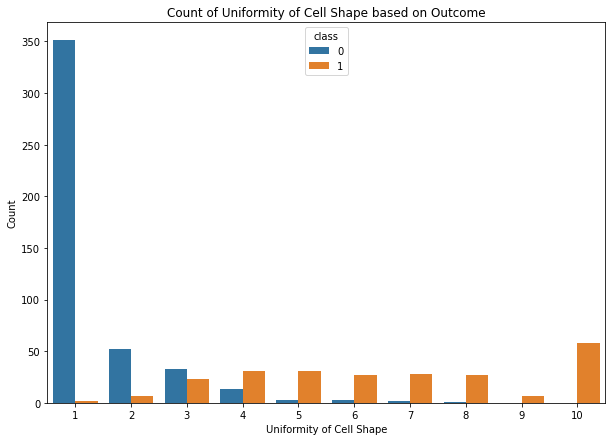

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(cancer_df['shape'], hue=cancer_df['class'])
plt.title("Count of Uniformity of Cell Shape based on Outcome")
plt.xlabel("Uniformity of Cell Shape")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

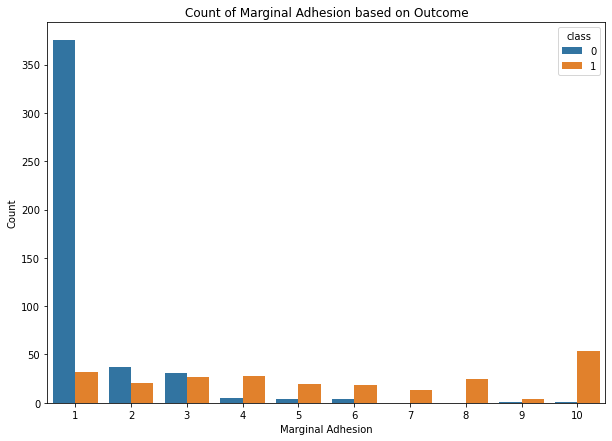

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(cancer_df['adhesion'], hue=cancer_df['class'])
plt.title("Count of Marginal Adhesion based on Outcome")
plt.xlabel("Marginal Adhesion")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

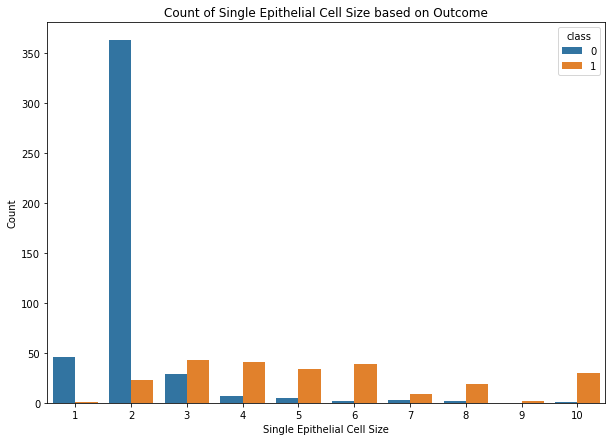

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(cancer_df['single'], hue=cancer_df['class'])
plt.title("Count of Single Epithelial Cell Size based on Outcome")
plt.xlabel("Single Epithelial Cell Size")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

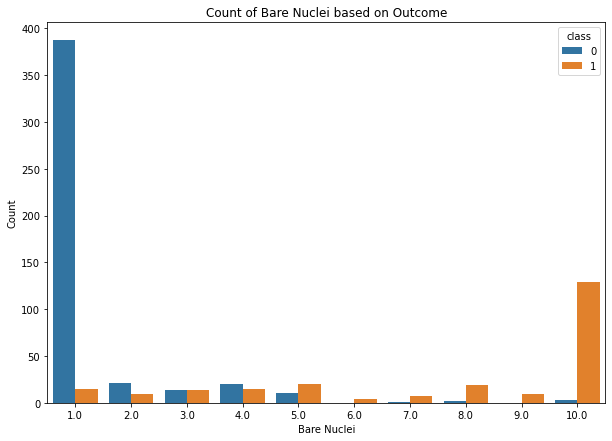

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(cancer_df['nuclei'], hue=cancer_df['class'])
plt.title("Count of Bare Nuclei based on Outcome")
plt.xlabel("Bare Nuclei")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

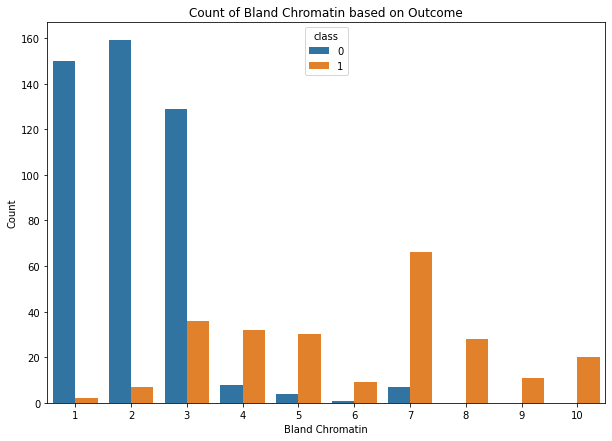

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(cancer_df['chromatin'], hue=cancer_df['class'])
plt.title("Count of Bland Chromatin based on Outcome")
plt.xlabel("Bland Chromatin")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

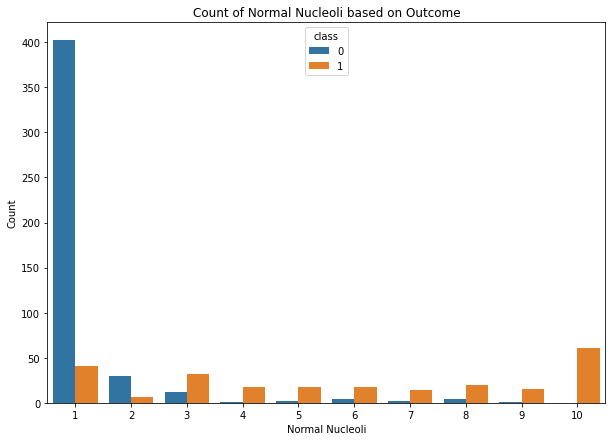

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(cancer_df['nucleoli'], hue=cancer_df['class'])
plt.title("Count of Normal Nucleoli based on Outcome")
plt.xlabel("Normal Nucleoli")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

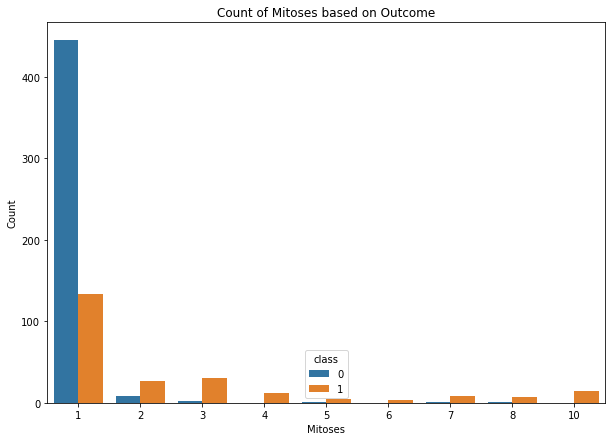

In [44]:
plt.figure(figsize=(10,7))
sns.countplot(cancer_df['mitosis'], hue=cancer_df['class'])
plt.title("Count of Mitoses based on Outcome")
plt.xlabel("Mitoses")
plt.ylabel("Count")

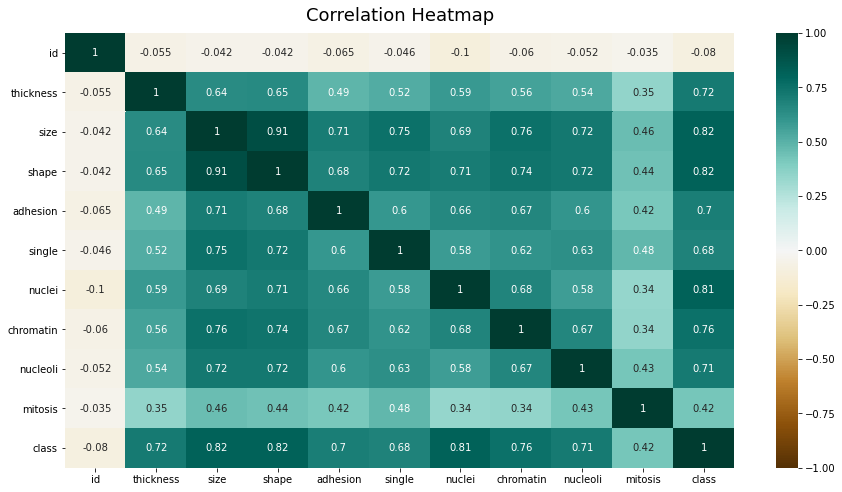

In [57]:
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(cancer_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Using LazyPredict function to choose the best ML models

In [43]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X = cancer_df.drop('class', axis=1)
y = cancer_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 32.15it/s]


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.98               0.98     0.98      0.98   
SVC                                0.98               0.98     0.98      0.98   
NuSVC                              0.97               0.97     0.97      0.97   
NearestCentroid                    0.97               0.97     0.97      0.97   
GaussianNB                         0.97               0.97     0.97      0.97   
SGDClassifier                      0.97               0.97     0.97      0.97   
Perceptron                         0.97               0.97     0.97      0.97   
BernoulliNB                        0.97               0.97     0.97      0.97   
RandomForestClassifier             0.97               0.97     0.97      0.97   
KNeighborsClassifier               0.97               0.97     0.97      0.97   
LogisticRegression          

### Creating train and test sets

In [48]:
from sklearn.model_selection import train_test_split

In [58]:
X = cancer_df.drop(['class', 'id'], axis=1)
y = cancer_df['class']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [60]:
print(X_train.shape, X_test.shape)

(489, 9) (210, 9)


In [61]:
print(y_train.shape, y_test.shape)

(489,) (210,)


### Building ML Models

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Extre Tree Classifier Model 

In [62]:
model_1 = ExtraTreesClassifier(n_estimators=750)

In [63]:
model_1.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=750)

In [64]:
model1_preds = model_1.predict(X_test)

In [65]:
print("Extre Tree Classifier model's score: ", model_1.score(X_test, y_test))

Extre Tree Classifier model's score:  0.9714285714285714


In [67]:
print("Extre Tree Classifier model's accuracy: ", accuracy_score(y_test, model1_preds))

Extre Tree Classifier model's accuracy:  0.9714285714285714


Text(0.5, 1.0, 'Confusion Matrix for Extra Tree Classifier Model')

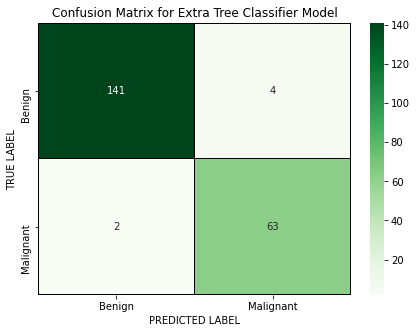

In [74]:
#Confusion Matrix of Extra Tree Model model.
cm = confusion_matrix(y_test, model1_preds)

x_axis_labels = ["Benign", "Malignant"]
y_axis_labels = ["Benign", "Malignant"]

f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Extra Tree Classifier Model')

In [75]:
print(classification_report(y_test, model1_preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.94      0.97      0.95        65

    accuracy                           0.97       210
   macro avg       0.96      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



#### SVC Model

In [68]:
model_2 = SVC()

In [69]:
model_2.fit(X_train, y_train)

SVC()

In [70]:
model2_preds = model_2.predict(X_test)

In [72]:
print("SVC model's score: ", model_2.score(X_test, y_test))

SVC model's score:  0.9714285714285714


In [73]:
print("SVC model's accuracy: ", accuracy_score(y_test, model2_preds))

SVC model's accuracy:  0.9714285714285714


Text(0.5, 1.0, 'Confusion Matrix for SVC Model')

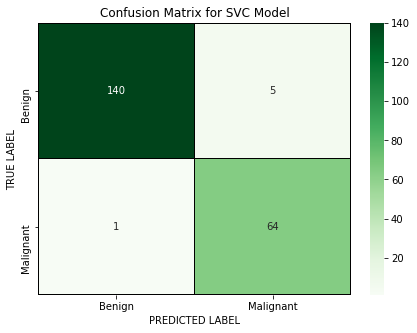

In [76]:
#Confusion Matrix of SVC model.
cm = confusion_matrix(y_test, model2_preds)

x_axis_labels = ["Benign", "Malignant"]
y_axis_labels = ["Benign", "Malignant"]

f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVC Model')

In [77]:
print(classification_report(y_test, model2_preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.93      0.98      0.96        65

    accuracy                           0.97       210
   macro avg       0.96      0.98      0.97       210
weighted avg       0.97      0.97      0.97       210



### Saving the ML Model

In [78]:
from joblib import dump
MODEL_NAME = "breast-cancer-model.pkl"
dump(model_1, MODEL_NAME)

['breast-cancer-model.pkl']